# Number of words

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from PIL import Image

In [0]:
import pandas as pd
import numpy as np

In [0]:
lemmatized_text = pd.read_csv('/content/virus_lemmatized.csv', sep=',', )
#lemmatized_text = lemmatized_text.drop(['Unnamed: 0'], axis=1)

In [0]:
import pickle
 
with open('/content/virus_lemmatized_file', 'rb') as lemmatized_file:
    lemmatized_text = pickle.load(lemmatized_file)

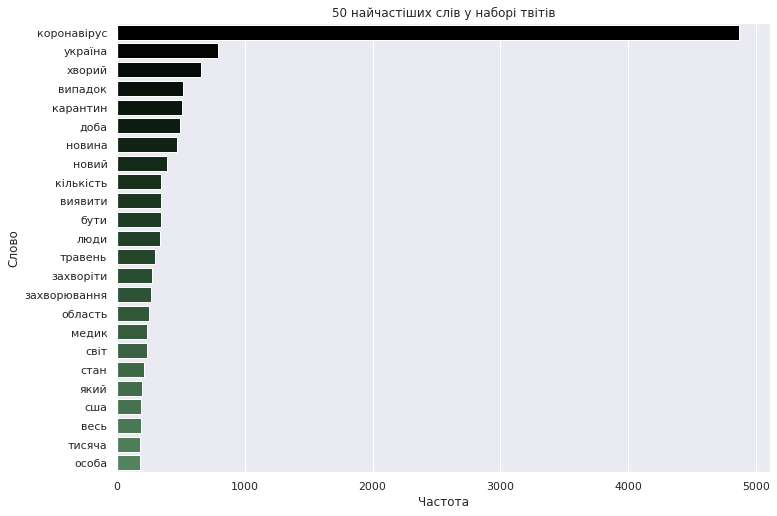

In [43]:
freq = {}
for line in lemmatized_text:
  for word in line:
    if word in freq.keys():
      freq[word] += 1
    else:
      freq[word] = 1

del freq['не']
del freq['']

freq_r = [[k,v] for v,k in freq.items()]

freq_r.sort()
freq_r.reverse()

freq_r_0 = [i[0] for i in freq_r[:24]]
freq_r_1 = [i[1] for i in freq_r[:24]]
df = pd.DataFrame(data = {'Частота': freq_r_0, 'Слово': freq_r_1})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Слово',data=df, palette = sns.cubehelix_palette(50, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = '50 найчастіших слів у наборі твітів');

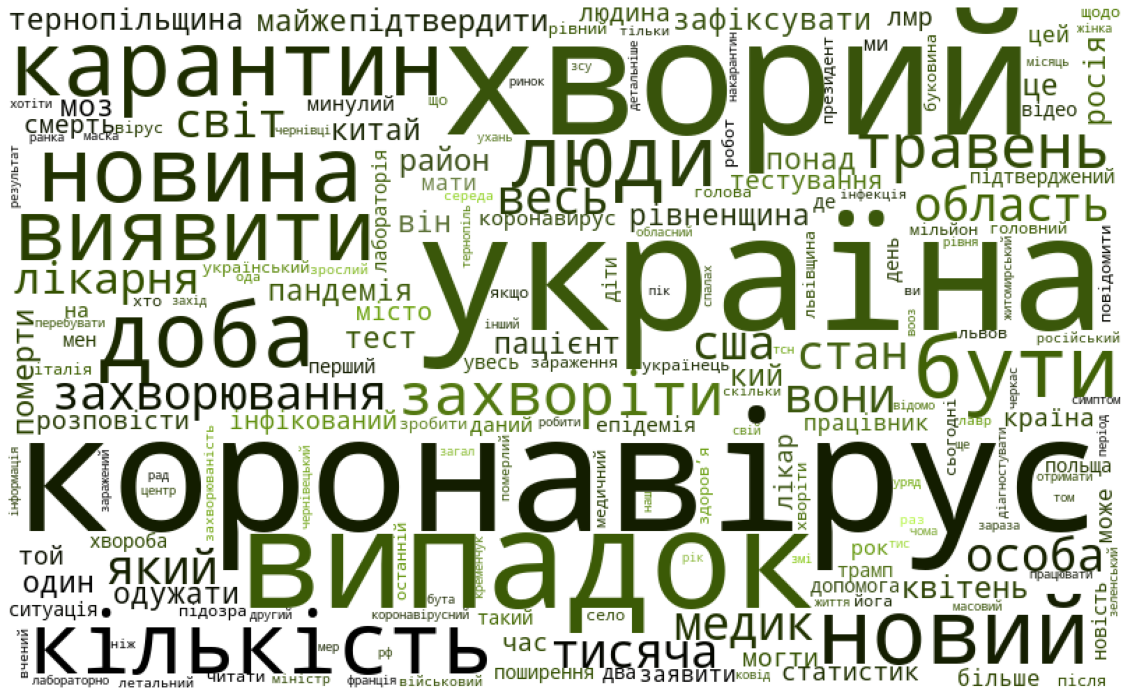

In [47]:
char_mask = np.array(Image.open("v1.png"))    
image_colors = ImageColorGenerator(char_mask)

words = ' '.join([i[1] for i in freq_r[:200]])

wc = WordCloud(background_color="white", max_words=200, width=1000, height=1000, mask=char_mask, random_state=1).generate(words)
plt.figure(figsize=(20,20))
plt.xticks([])
plt.yticks([])
plt.imshow(wc.recolor(color_func=image_colors))

In [0]:
import nltk

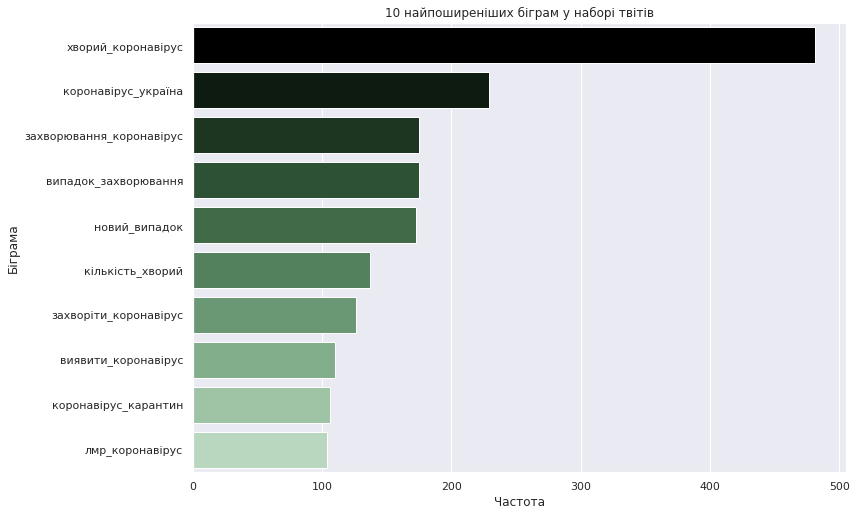

In [52]:
freq_bi = {}
for line in lemmatized_text:
  for bis in list(nltk.bigrams(line)):
    if '_'.join(bis) in freq_bi.keys():
      freq_bi['_'.join(bis)] += 1
    else:
      freq_bi['_'.join(bis)] = 1

freq_bi_sorted = [[k,v] for v,k in freq_bi.items()]
freq_bi_sorted.sort()
freq_bi_sorted.reverse()

freq_bi_0 = [i[0] for i in freq_bi_sorted[:10]]
freq_bi_1 = [i[1] for i in freq_bi_sorted[:10]]
df_bi = pd.DataFrame(data = {'Частота': freq_bi_0, 'Біграма': freq_bi_1})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Біграма',data=df_bi, palette = sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.8, reverse=True)).set(title = '10 найпоширеніших біграм у наборі твітів');

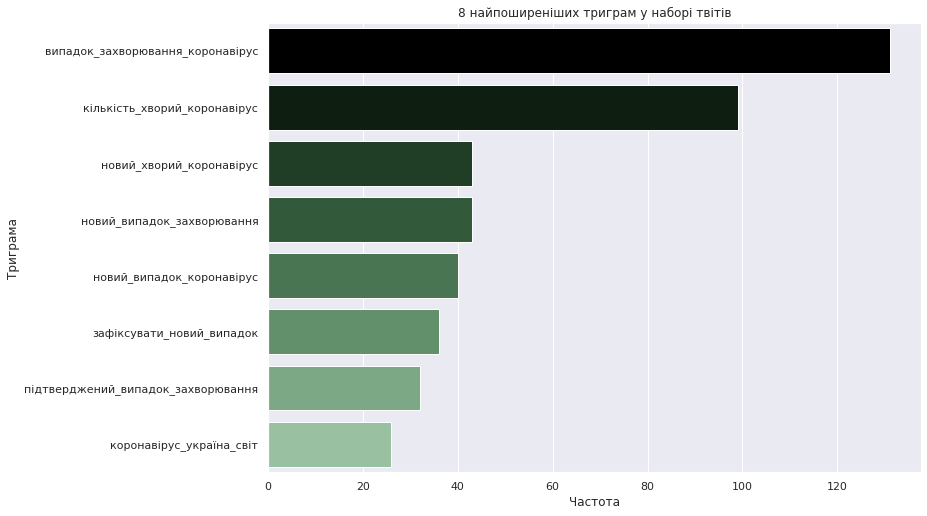

In [55]:
freq_tr = {}
for line in lemmatized_text:
  for tr in list(nltk.trigrams(line)):
    if '_'.join(tr) in freq_tr.keys():
      freq_tr['_'.join(tr)] += 1
    else:
      freq_tr['_'.join(tr)] = 1

freq_tr_sorted = [[k,v] for v,k in freq_tr.items()]
freq_tr_sorted.sort()
freq_tr_sorted.reverse()

freq_tr_0 = [i[0] for i in freq_tr_sorted[:8]]
freq_tr_1 = [i[1] for i in freq_tr_sorted[:8]]
df_tr = pd.DataFrame(data = {'Частота': freq_tr_0, 'Триграма': freq_tr_1})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Триграма',data=df_tr, palette = sns.cubehelix_palette(9, start=2, rot=0, dark=0, light=.8, reverse=True)).set(title = '8 найпоширеніших триграм у наборі твітів');

# Why sentiment analysis is bad idea?

In [0]:
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install morfessor

!polyglot download embeddings2.uk
!polyglot download ner2.uk
!polyglot download sentiment2.uk

In [0]:
from polyglot.text import Text, Word, BaseBlob

In [0]:
polar = []
for line in range(len(lemmatized_text)):
  try:
    polar.append([line, Text(' '.join(lemmatized_text[line]), hint_language_code = 'uk').polarity])
  except ZeroDivisionError:
    polar.append([line,-1])
  except ValueError:
    polar.append([line,0])

In [59]:
from statistics import mean, stdev, median, mode
polar_df = pd.DataFrame(data = {'sentence': [i[0] for i in polar],
                                'Polarity score': [round(i[1],1) for i in polar]})
print("Медіана полярних значень твітів: {}\nМода полярних значень твітів: {}\nСереднє полярних значень твітів: {}\nСтандартне відхилення полярних значень твітів: {}".format(median(polar_df['Polarity score']),mode(polar_df['Polarity score']),mean(polar_df['Polarity score']),stdev(polar_df['Polarity score'])))

Медіана полярних значень твітів: -1.0
Мода полярних значень твітів: -1.0
Середнє полярних значень твітів: -0.4579457791492175
Стандартне відхилення полярних значень твітів: 0.7745704923870617


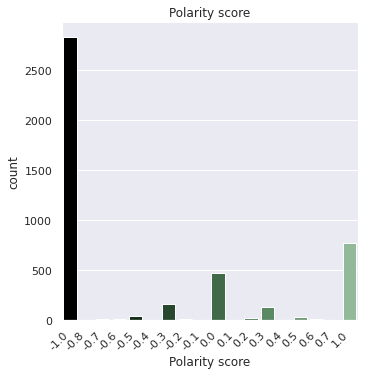

In [61]:
chart = sns.catplot(x="Polarity score", kind="count", data=polar_df, palette = sns.cubehelix_palette(25, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Polarity score');
plt.xticks(rotation=45,horizontalalignment='right', fontweight='light');

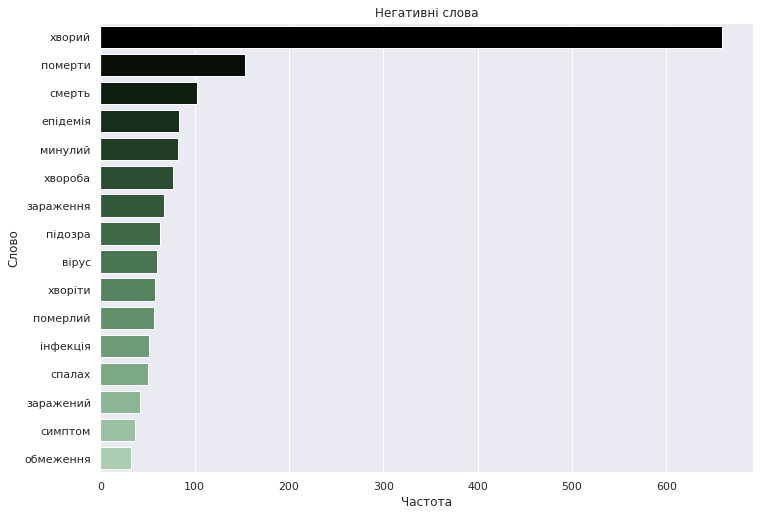

In [62]:
neg_word = {}
pos_word = {}
for line in lemmatized_text:
  for word in line:
    if Word(word, language = 'uk').polarity == -1:
      if word in neg_word.keys():
        neg_word[word] += 1
      else:
        neg_word[word] = 1
    elif Word(word, language = 'uk').polarity == 1:
      if word in pos_word.keys():
        pos_word[word] += 1
      else:
        pos_word[word] = 1

del neg_word['ніж']
del neg_word['час']
del pos_word['як']

neg_word_r = [[k,v] for v,k in neg_word.items()]

neg_word_r.sort()
neg_word_r.reverse()

neg_word_r_0 = [i[0] for i in neg_word_r]
neg_word_r_1 = [i[1] for i in neg_word_r]
df = pd.DataFrame(data = {'Частота': neg_word_r_0[:16], 'Слово': neg_word_r_1[:16]})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Слово',data=df, palette = sns.cubehelix_palette(20, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Негативні слова');

In [63]:
neg_word_r[:10]

[[659, 'хворий'],
 [153, 'померти'],
 [102, 'смерть'],
 [83, 'епідемія'],
 [82, 'минулий'],
 [77, 'хвороба'],
 [67, 'зараження'],
 [63, 'підозра'],
 [60, 'вірус'],
 [58, 'хворіти']]

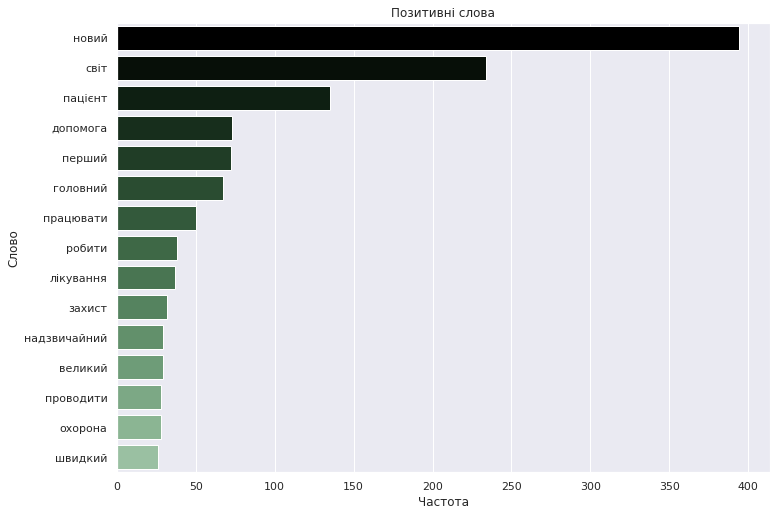

In [64]:
pos_word_r = [[k,v] for v,k in pos_word.items()]

pos_word_r.sort()
pos_word_r.reverse()

pos_word_r_0 = [i[0] for i in pos_word_r]
pos_word_r_1 = [i[1] for i in pos_word_r]
df = pd.DataFrame(data = {'Частота': pos_word_r_0[:15], 'Слово': pos_word_r_1[:15]})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Слово',data=df, palette = sns.cubehelix_palette(20, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Позитивні слова');

# Name Entity Extraction

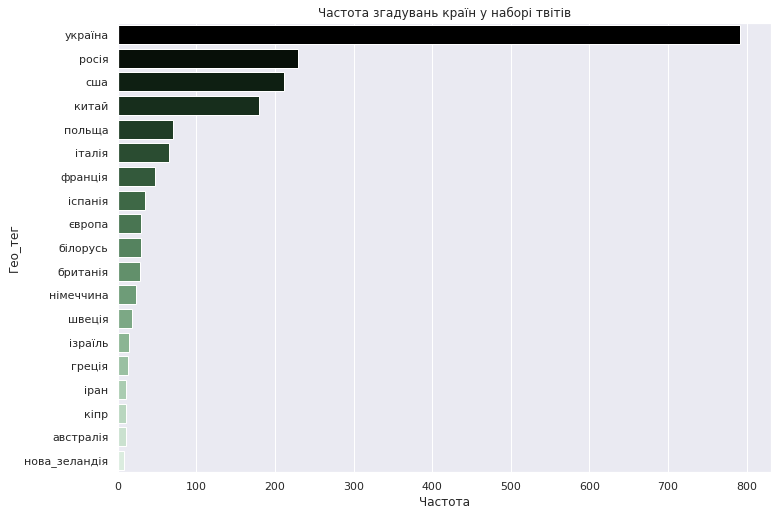

In [66]:
names_country = ['україна','італія','сша','білорус','росія','китай','польща','франція','рф','ухань','британія',
                 'німеччина', 'іспанія','європа','москва','ньюйорк','швеція','московський','білорусь', 'ізраїль', 
                 'іран', 'греція',  'зеландія', 'кіпр', 'австралія']

df_country = {k:freq[k] for k in names_country}

df_country['росія'] = df_country['росія'] + df_country['москва'] + df_country['московський'] + df_country['рф']
del df_country['москва']
del df_country['московський']
del df_country['рф']

df_country['сша'] = df_country['сша'] + df_country['ньюйорк']
del df_country['ньюйорк']

df_country['білорусь'] = df_country['білорусь'] + df_country['білорусь']
del df_country['білорус']

df_country['китай'] = df_country['китай'] + df_country['ухань']
del df_country['ухань']

df_country['нова_зеландія'] = df_country.pop('зеландія')

dictlist=[]
for key, value in df_country.items():
    temp = [key,value]
    dictlist.append(temp)

nm = [i[0] for i in dictlist]
nb = [i[1] for i in dictlist]

df_geo = pd.DataFrame(data={"Гео_тег":nm, "Частота":nb})
df_geo = df_geo.sort_values("Частота",ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Гео_тег',data=df_geo, palette = sns.cubehelix_palette(20, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Частота згадувань країн у наборі твітів');

In [0]:
names_ukr = ['тернопільщина', 'кий','рівненщина','львов', 'львівщина',  'буковина', 'житомирський', 'чернівецький', 'чернівці',
         'кременчук',  'тернопіль', 'полтавщина',  'рівненський', 'харківський', 'волин','київщина', 'закарпаття', 'крим', 'житомир',
         'дніпро',  'полтава', 'хмельницький', 'львівський', 'київ',  'львів', 'дніпропетровщина', 'тернопілля', 
         'київський', 'волинський',  'чернігів', 'черкащина', 'херсонщина', 'тернопільський', 'одеса', 'карпати', 'дрогобиччин', 'ужгород', 'ірпінь', 
         'київськаобласть', 'тернополь', 'полтавський', 'кременецький', 'херсонський','харківщина', 'одещина', 'маріуполь', 'каховка']

names_ukr = {k:freq[k] for k in names_ukr}

names_ukr['тернопіль'] = names_ukr['тернопіль'] + names_ukr['тернопільщина'] + names_ukr['тернопільський'] + names_ukr['тернополь']
del names_ukr['тернопільщина']
del names_ukr['тернопільський']
del names_ukr['тернополь']

names_ukr['полтава'] = names_ukr['полтава'] + names_ukr['полтавщина']
del names_ukr['полтавщина']

names_ukr['київ'] = names_ukr.pop('кий')

names_ukr['волинь'] = names_ukr['волин'] + names_ukr['волинський']
del names_ukr['волин']
del names_ukr['волинський']

names_ukr['дніпро'] = names_ukr['дніпро'] + names_ukr['дніпропетровщина']
del names_ukr['дніпропетровщина']

names_ukr['житомир'] = names_ukr['житомир'] + names_ukr['житомирський']
del names_ukr['житомирський']

names_ukr['київ'] = names_ukr['київ'] + names_ukr['київськаобласть']+ names_ukr['київський']+ names_ukr['київщина']
del names_ukr['київськаобласть']
del names_ukr['київський']
del names_ukr['київщина']

names_ukr['львів'] = names_ukr['львов'] + names_ukr['львівський']+ names_ukr['львівщина']+ names_ukr['львів']
del names_ukr['львов']
del names_ukr['львівський']
del names_ukr['львівщина']

names_ukr['одеса'] = names_ukr['одеса'] + names_ukr['одещина']
del names_ukr['одещина']

names_ukr['полтава'] = names_ukr['полтава'] + names_ukr['полтавський']
del names_ukr['полтавський']

names_ukr['рівне'] = names_ukr['рівненський'] + names_ukr['рівненщина']
del names_ukr['рівненський']
del names_ukr['рівненщина']

names_ukr['тернопіль'] = names_ukr['тернопіль'] + names_ukr['тернопілля']
del names_ukr['тернопілля']

names_ukr['харків'] = names_ukr['харківський'] + names_ukr['харківщина']
del names_ukr['харківський']
del names_ukr['харківщина']

names_ukr['херсон'] = names_ukr['херсонський'] + names_ukr['херсонщина']
del names_ukr['херсонський']
del names_ukr['херсонщина']

names_ukr['чернівці'] = names_ukr['чернівецький'] + names_ukr['чернівці']
del names_ukr['чернівецький']

In [0]:
dictlist=[]
for key, value in names_ukr.items():
    temp = [key,value]
    dictlist.append(temp)

nm = [i[0] for i in dictlist]
nb = [i[1] for i in dictlist]

df_geo_uk = pd.DataFrame(data={"Укр_гео_тег":nm, "Частота":nb}).sort_values('Частота',ascending=False)

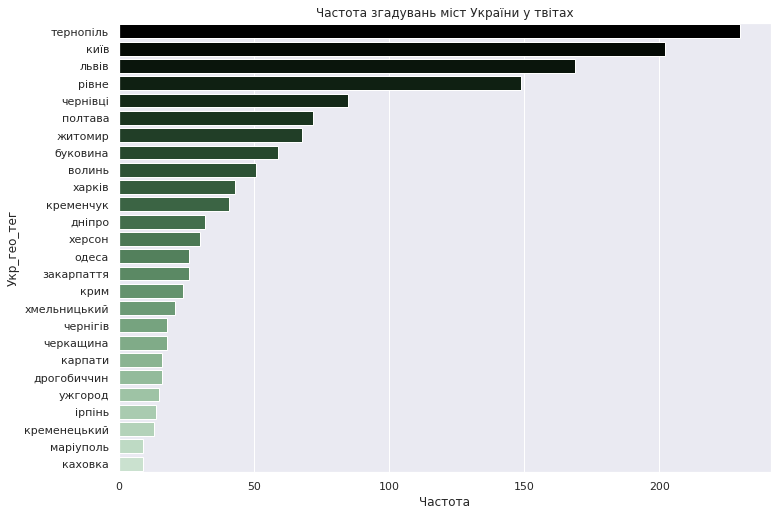

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Укр_гео_тег',data=df_geo_uk, palette = sns.cubehelix_palette(29, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Частота згадувань міст України у твітах');

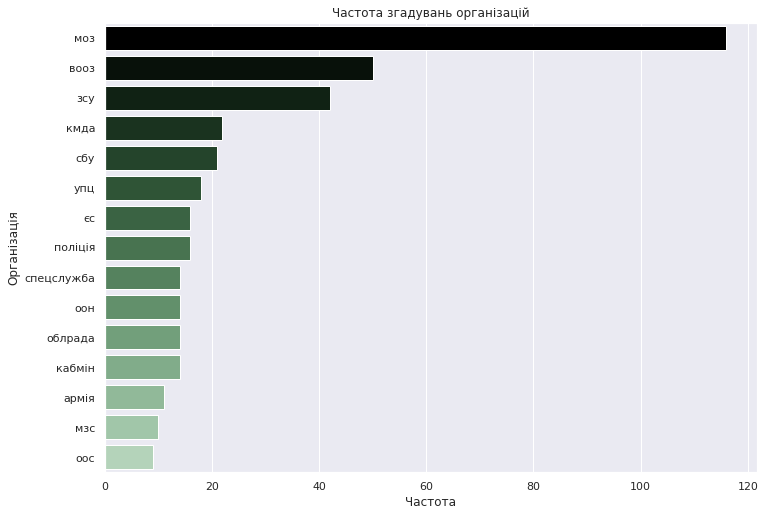

In [73]:
names_org = ['моз', 'вооз', 'зсу', 'кмда', 'сбу', 'упц', 'єс', 'поліція', 'спецслужба', 'оон', 'облрада' , 'кабмін',
         'армія', 'мзс', 'оос']

names_org = {k:freq[k] for k in names_org}

dictlist=[]
for key, value in names_org.items():
    temp = [key,value]
    dictlist.append(temp)

nm = [i[0] for i in dictlist]
nb = [i[1] for i in dictlist]

df_org = pd.DataFrame(data={"Організація":nm, "Частота":nb}).sort_values('Частота',ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Організація',data=df_org, palette = sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Частота згадувань організацій');

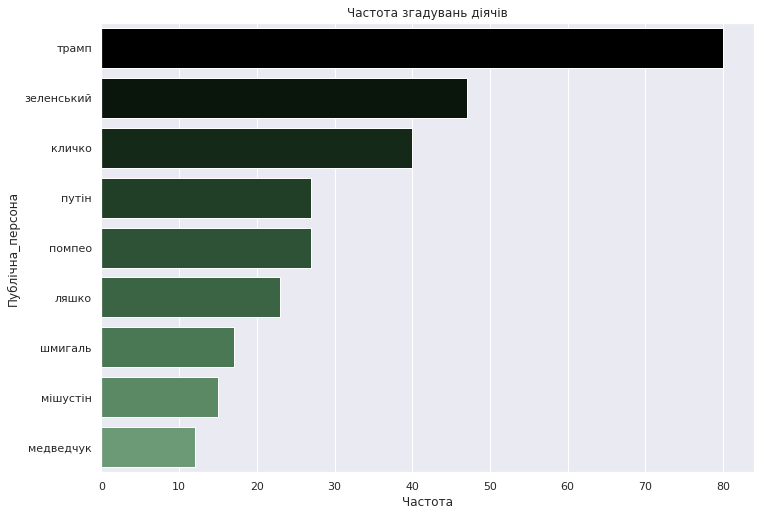

In [74]:
names_ppl = ['трамп','зеленський', 'кличко', 'путін', 'помпео', 'ляшко', 'шмигаль', 'мішустіна', 'медведчук',
         'кличка', 'зе']

names_ppl = {k:freq[k] for k in names_ppl}

names_ppl['мішустін'] = names_ppl['мішустіна'] 
del names_ppl['мішустіна']

names_ppl['зеленський'] = names_ppl['зеленський'] + names_ppl['зе']
del names_ppl['зе']

names_ppl['кличко'] = names_ppl['кличко'] + names_ppl['кличка']
del names_ppl['кличка']

dictlist=[]
for key, value in names_ppl.items():
    temp = [key,value]
    dictlist.append(temp)

nm = [i[0] for i in dictlist]
nb = [i[1] for i in dictlist]

names_ppl = pd.DataFrame(data={"Публічна_персона":nm, "Частота":nb}).sort_values('Частота',ascending=False)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Публічна_персона',data=names_ppl, palette = sns.cubehelix_palette(15, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Частота згадувань діячів');

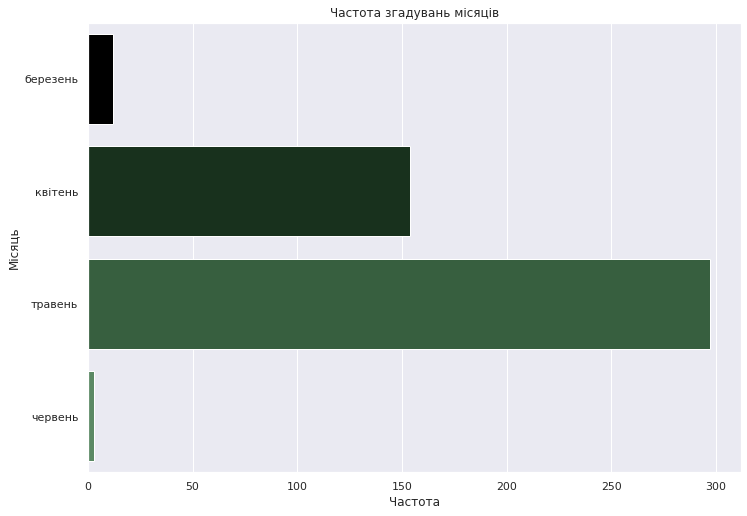

In [75]:
names_time = pd.DataFrame(data={"Місяць":["березень","квітень", "травень", "червень"], "Частота":[freq["березень"],freq["квітень"], freq["травень"], freq["червень"]]})
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='Частота',y='Місяць',data=names_time,
            palette = sns.cubehelix_palette(7, start=2, rot=0, dark=0, light=.95, reverse=True)).set(title = 'Частота згадувань місяців');